In [33]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [34]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Power_P1", "Power_P2", "Water_Height", "Outflow"]

In [35]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

In [36]:
# Read in the data PST
pump = "PST232"
year = "2021"
month = "April"

PST232 = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
PST232.columns = columns
PST232["DateTime"] = pd.to_datetime(PST232["DateTime"], infer_datetime_format=True)

In [37]:
# PST238["Outflow_RolAvg_7"] = PST238["Outflow"].rolling(7).mean()
# PST232["Outflow_RolAvg_7"] = PST232["Outflow"].rolling(7).mean()
# PST232["Volume"] = water_level_to_volume(PST232["Water_Height"], "PST232")
PST232["Volume"] = water_level_to_volume(PST232["Water_Height"], "PST237")


In [43]:
PST232.iloc[-1]

DateTime        2021-04-30 23:59:08.934000
Power_P1                               0.0
Power_P2                               0.0
Water_Height                          0.58
Outflow                                0.0
Volume                          571.418005
Name: 63456, dtype: object

# P1 Power Consumption vs P2 Power Consumption
Looks strange that p1 and p2 never operate at the same time. 

Text(0.5, 0, 'Time')

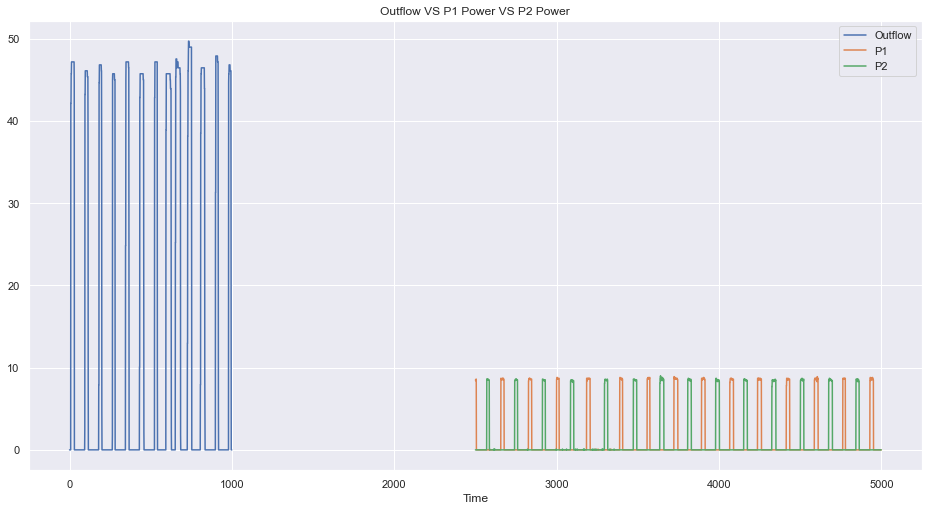

In [39]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
PST237["Power_P1"][0:1000].plot()
PST237["Power_P2"][0:1000].plot()
ax.legend(["Outflow", "P1", "P2"], loc="upper right")
ax.set_xlabel("Time")

# Same problem occurs with the water height. 
Water height should decrease while there is outflow, and otherwise satdely increase over time. 

Text(0.5, 0, 'Time')

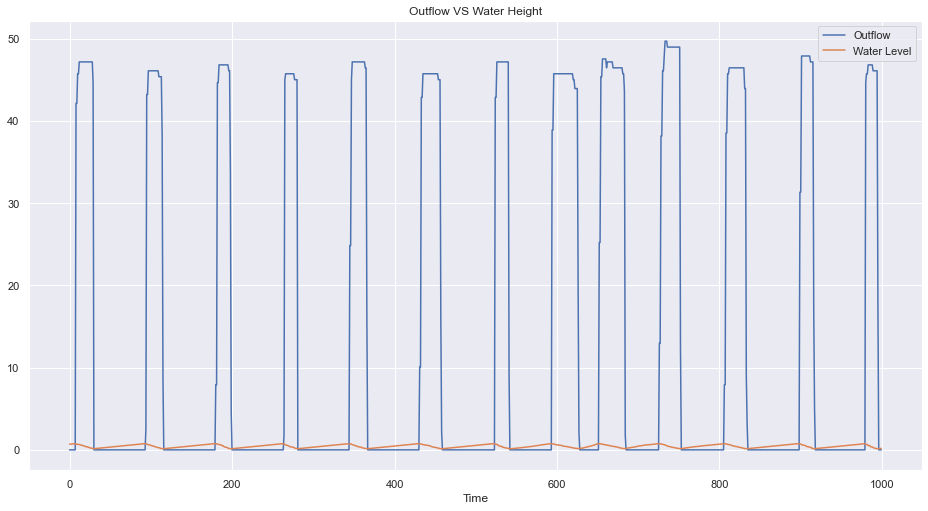

In [40]:
fig, ax = plt.subplots()
PST232.Outflow[0:1000].plot(title="Outflow VS Water Height")
PST232.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Level"], loc="upper right")
ax.set_xlabel("Time")


# Water Level and Outflow seems to be correct 

Text(0.5, 0, 'Time')

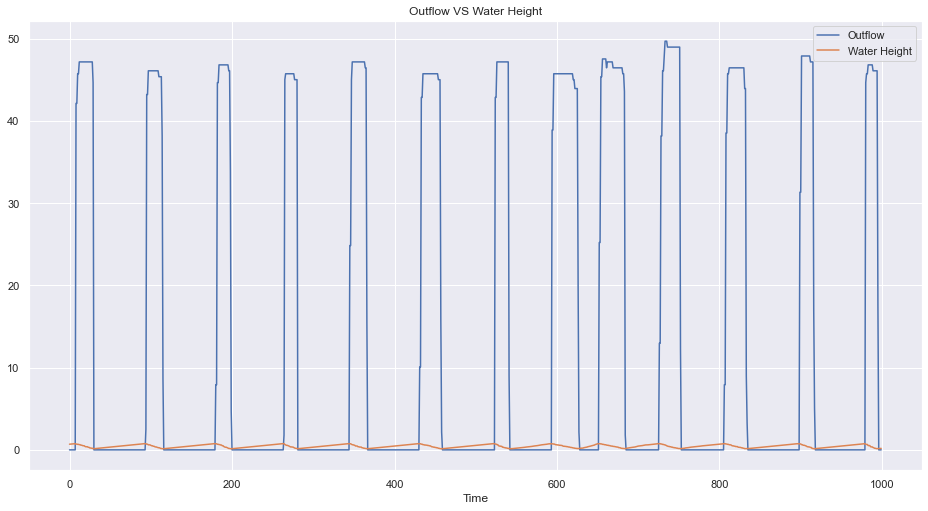

In [41]:
fig, ax = plt.subplots()
PST232.Outflow[0:1000].plot(title="Outflow VS Water Height")
PST232.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Height"], loc="upper right")
ax.set_xlabel("Time")

# Carefull X scale datetime is not correct, this plot is just for playing with the data interactively 

In [44]:
# px.line(, x="DateTime", y="", title="PST232")
# px.line(PST238, x="DateTime", y="Outflow_RolAvg_7", title="PST238")
fig = px.line(PST232, x="DateTime", y="Outflow", title='Interactive plot Water Height and Outflow')
fig.add_scatter(x=PST232['DateTime'], y=PST232['Water_Height'], mode='lines', name='PST232')
fig.show()